In [13]:
# Import libraries and set logger
import time
import logging

import numpy as np
import pandas as pd
import open3d as o3d

from matplotlib import pyplot as plt
from pathlib import Path


LOG_LEVEL = logging.INFO
logging.basicConfig(
    format="%(asctime)s | %(levelname)s: %(message)s",
    level=LOG_LEVEL,
)

In [14]:
# Parameters
PCD_DIR = "res/point_clouds_meshed"
PCD_PATTERN = "sampled*.ply"  
OUT_DIR = "res/volumes_variations"
DOD_DIR = "x"
TSTEP = 5
GRID_STEP = 0.3

In [15]:
# Get the path of the output file with respect to belpy root folder
out_dir = Path().parent.absolute().parents[1] / OUT_DIR
fout_name = f"{PCD_PATTERN.split('*')[0]}_dir{DOD_DIR.upper()}_tstep{TSTEP}_grid{GRID_STEP}"
fout = out_dir / f"{fout_name}.csv"

# Read volume results from file and make plot
column_names = [
    "pcd0",
    "pcd1",
    "volume",
    "addedVolume",
    "removedVolume",
    "surface",
    "matchingPercent",
    "averageNeighborsPerCell",
]
df = pd.read_csv(fout, sep=",", names=column_names)

Data manipulation

In [16]:
max_surface_match = df["matchingPercent"].to_numpy().max()
df["date_in"] = pd.to_datetime(
    df["pcd0"].str.replace(f"{PCD_PATTERN.split('*')[0]}_", ""), format="%Y_%m_%d"
)
df.sort_values(by="date_in", inplace=True)

df["date_fin"] = pd.to_datetime(
    df["pcd1"].str.replace(f"{PCD_PATTERN.split('*')[0]}_", ""), format="%Y_%m_%d"
)
df["dt"] = (df.date_fin - df.date_in) / np.timedelta64(1, "D")
df["volume_daily"] = df["volume"] / df["dt"]
df["volume_daily_normalized"] = (
    df["volume_daily"] / df["matchingPercent"] * max_surface_match
)

df["volume_daily_cumul"] = df["volume_daily"].cumsum()
df["volume_daily_norm_cumul"] = df["volume_daily_normalized"].cumsum()

Export results to excel file

In [17]:
df.to_excel(out_dir / f"{fout_name}.xlsx", index=False)

Plots

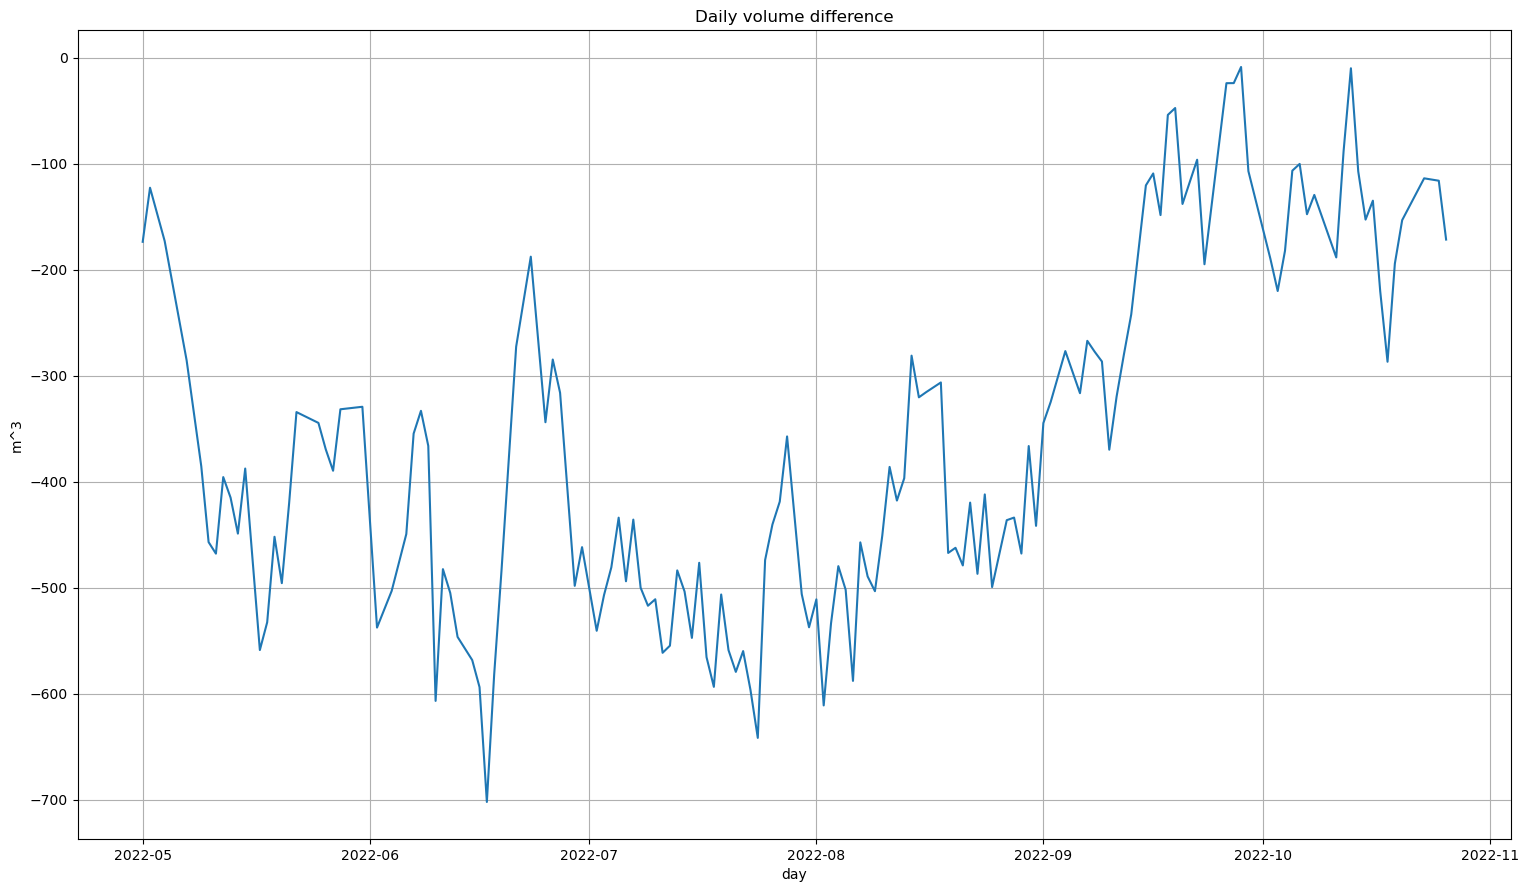

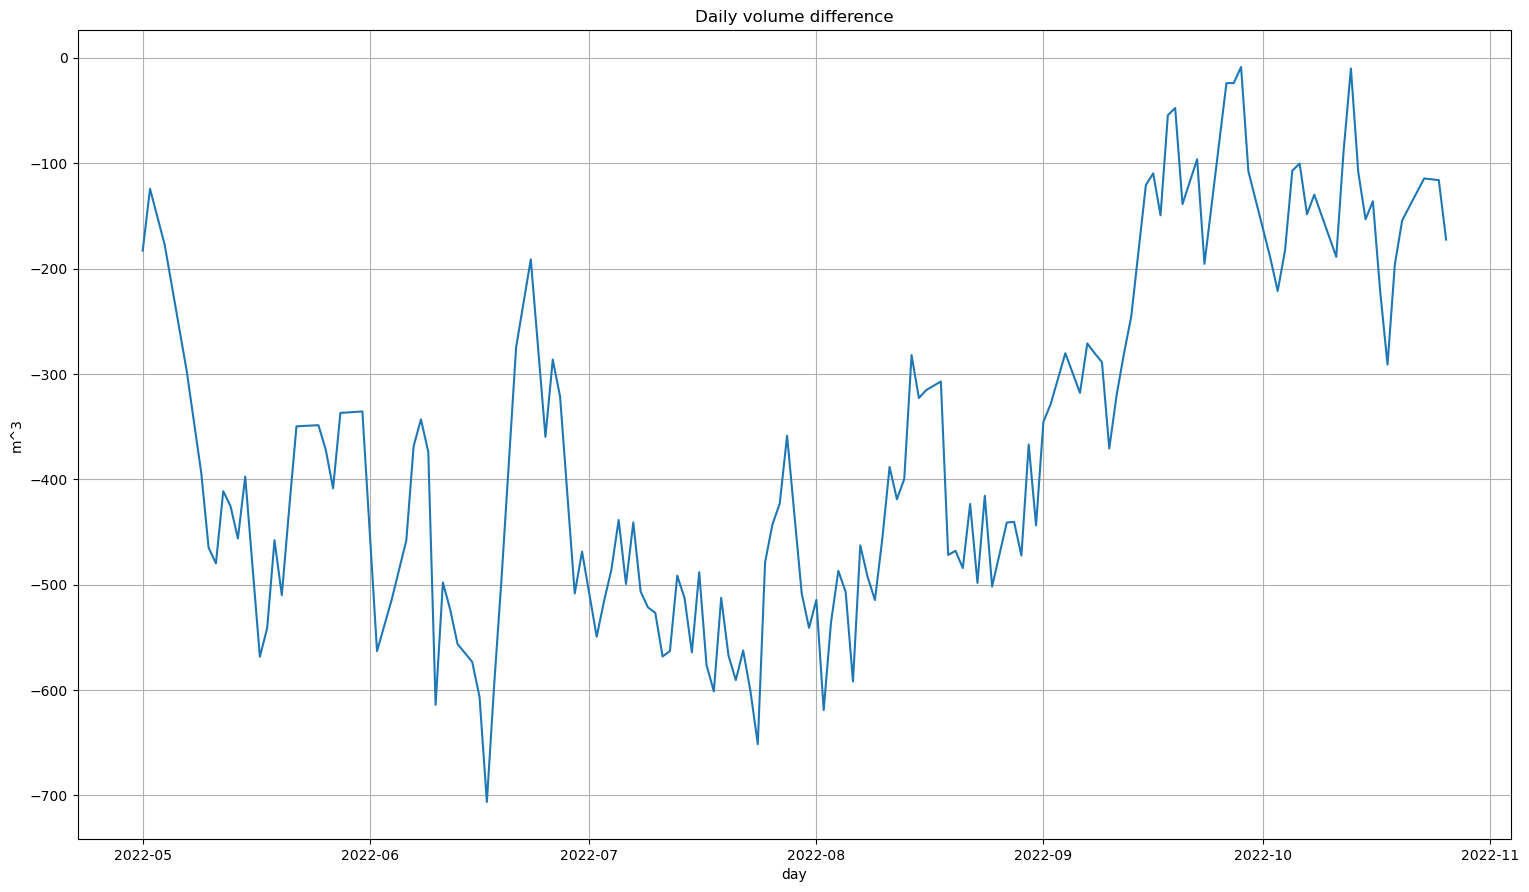

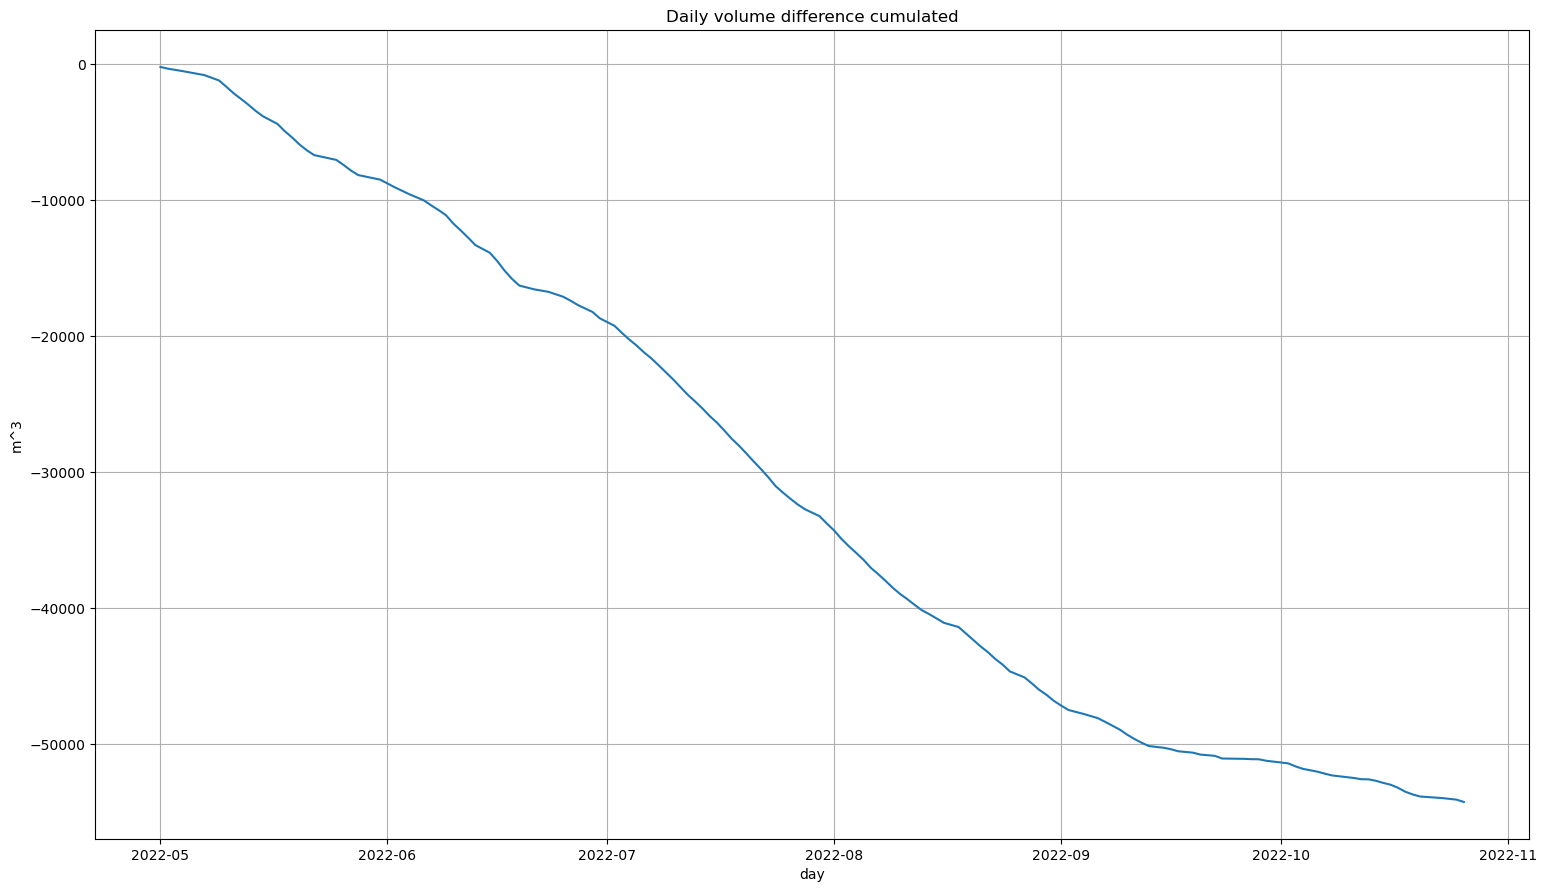

In [18]:
fig, ax = plt.subplots(1, 1)
ax.grid(visible=True, which="both")
ax.plot(df["date_in"], df["volume_daily"])
ax.set_xlabel("day")
ax.set_ylabel("m^3")
ax.set_title("Daily volume difference")
fig.set_size_inches(18.5, 10.5)
fig.savefig(out_dir / f"{fout_name}_daily_diff.png", dpi=300)

fig, ax = plt.subplots(1, 1)
ax.grid(visible=True, which="both")
ax.plot(df["date_in"], df["volume_daily_normalized"])
ax.set_xlabel("day")
ax.set_ylabel("m^3")
ax.set_title("Daily volume difference")
fig.set_size_inches(18.5, 10.5)
fig.savefig(out_dir / f"{fout_name}_daily_diff_norm.png", dpi=300)

fig, ax = plt.subplots(1, 1)
ax.grid(visible=True, which="both")
ax.plot(df["date_in"], df["volume_daily_norm_cumul"])
ax.set_xlabel("day")
ax.set_ylabel("m^3")
ax.set_title("Daily volume difference cumulated")
fig.set_size_inches(18.5, 10.5)
fig.savefig(out_dir / f"{fout_name}_daily_diff_norm_cumulated.png", dpi=300)